In [12]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
fp = os.path.join('data','gbif_sus_scrofa_california','gbif_sus_scrofa_california.shp')
fp

'data/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp'

In [3]:
pigs = gpd.read_file(fp)
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


In [4]:
# Check the data type of each column
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [5]:
pigs.geom_type


0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

In [6]:
# Examine CRS details
print('Ellipsoid: ', pigs.crs.ellipsoid)
print('Datum: ', pigs.crs.datum)
print('Is geographic?: ', pigs.crs.is_geographic)
print('Is projected?: ', pigs.crs.is_projected)

Ellipsoid:  WGS 84
Datum:  World Geodetic System 1984 ensemble
Is geographic?:  True
Is projected?:  False


In [7]:
# Obtain the geographic extent of the geo-dataframe
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

In [8]:
# Examine pig observation by year
pigs['year'].value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

In [9]:
# Select data from 2020 onwards
pigs_recent = pigs[pigs.year>=2020]

# Check length of original dataframe
print('Total number of observations: ' , len(pigs))

# Check length of new dataframe
print('Number of observations since 2020: ' , len(pigs_recent))



Total number of observations:  1046
Number of observations since 2020:  606


<AxesSubplot:>

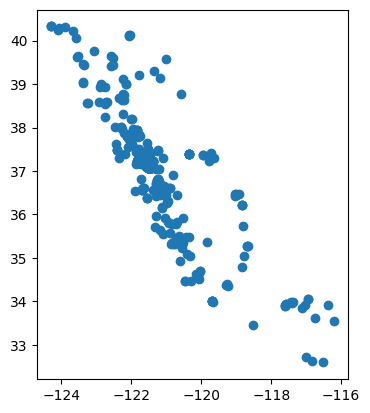

In [10]:
pigs_recent.plot()

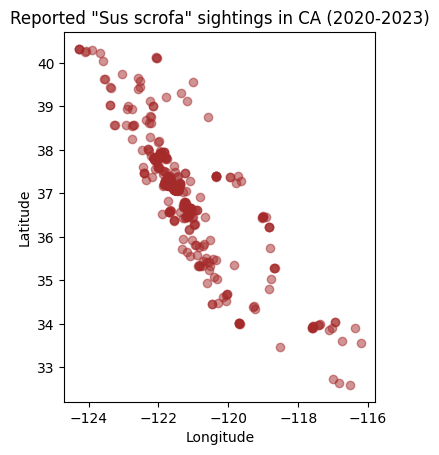

In [13]:
# Initialize empty figure
fig, ax = plt.subplots()

# Add data to axis
pigs_recent.plot(ax=ax,         # Add plot to axis
                 alpha=0.5,     # Adjust transparency
                 color='brown'  # Update point color
                 )

# Update axis 
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display figure
plt.show()

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


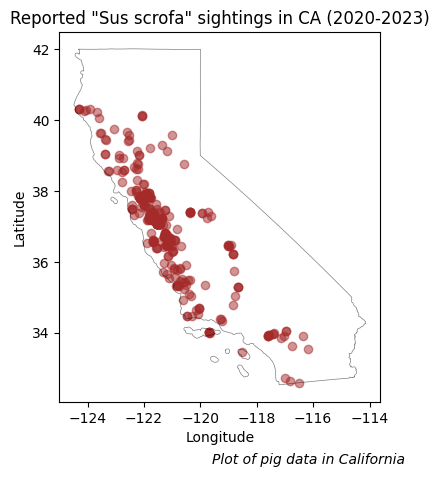

In [33]:
# Initialize empty figure
nf = os.path.join('data','ca_state_boundary', 'ca_state_boundary.shp')
ca_boundary = gpd.read_file(nf)
fig, ax = plt.subplots()


# Add data to axis
pigs_recent.plot(ax=ax,         # Add plot to axis
                 alpha=0.5,     # Adjust transparency
                 cmap=  # Update point color
                 )

ca_boundary.plot(ax=ax,         # Add plot to axis
                 alpha=0.5,  # Update point color
                 edgecolor='black',
                 color = 'none',
                 linewidth=0.5
                )

# Update axis 
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


fig.text(0.5, -0.02, "Plot of pig data in California", fontsize=10, style='italic')


# Display figure
plt.show()

In [17]:
ca_boundary = os.path.join('data','ca_state_boundary', 'ca_state_boundary.shp')